<a href="https://colab.research.google.com/github/aniekh/personal_learning/blob/main/Learninggoal4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning goal 4: visualising geospatial data

### Original learning goal:

"*I want to learn how to visualise and communicate geospatial data in a relevant and easy-to-understand way. Currently I have some knowledge on visualising and communicating data, but very little experience visualising and communicating geospatial data . At the end of this course I want to know how to make relevant visualisations for geospatial data and therefore will produce a Jupyter notebook in which I describe how to make at least three different visualisation methods for geospatial data and their pros and cons.*"

# Introduction
Instead of looking at boxplot and scatterplots, which ive done plenty of times before, I wanted to focus on learning methods for the visualising of geospatial data. I have chosen three different maps that will be discussed in this notebook:
- `Chloropleth map`
- `Dot map` 
- `Heat map`

We will talk about the differences, how they are made and when to use them. Let's start!


###Chloropleth map
Choropleth Maps display divided geographical areas or regions that are coloured in relation to a data variable. It shows a color based on a value per geographical area. I showed how to make a chloropleth map already in the learning goal 2 notebook, but lets give a quick recap! There we showed the Nitrogen excretion (the data variable) per municipality (the geographical area). We'll go through it quickly, if you want to see it in more detail please look at my learning goal 2 notebook.  

In [ ]:
#run only when geopandas is not yet installed
!pip install geopandas


     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 6.3 MB 36.8 MB/s 
     |████████████████████████████████| 16.7 MB 9.6 MB/s 


In [ ]:
# Load all importance packages
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Point
from unicodedata import normalize

import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

This time we'll be using inhabitants/km2 data from CBS.

In [ ]:
geodata_url = 'https://geodata.nationaalgeoregister.nl/cbsgebiedsindelingen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_gemeente_2017_gegeneraliseerd&outputFormat=json'
municipalities = gpd.read_file(geodata_url)

inhabitants = pd.read_csv('/content/Inhabitants.csv',delimiter = ';')
inhabitants['RegioS'] = inhabitants['RegioS'].str.strip()
inhabitants['Inhabitants_per_km2'].fillna(0, inplace=True)

municipalitie_codes = pd.read_csv('/content/Gemeenten alfabetisch 2017.csv',delimiter = ';')
municipalitie_codes['RegioS'] = municipalitie_codes['GemeentecodeGM'].str.strip()

data = pd.merge(inhabitants, municipalitie_codes,left_on = 'RegioS', right_on = 'Gemeentenaam')
data = data.drop(columns=['Gemeentenaam','GemeentecodeGM'])

Text(0.5, 1.0, 'Population density in the Netherlands in 2021 (inhabitants/km2)')

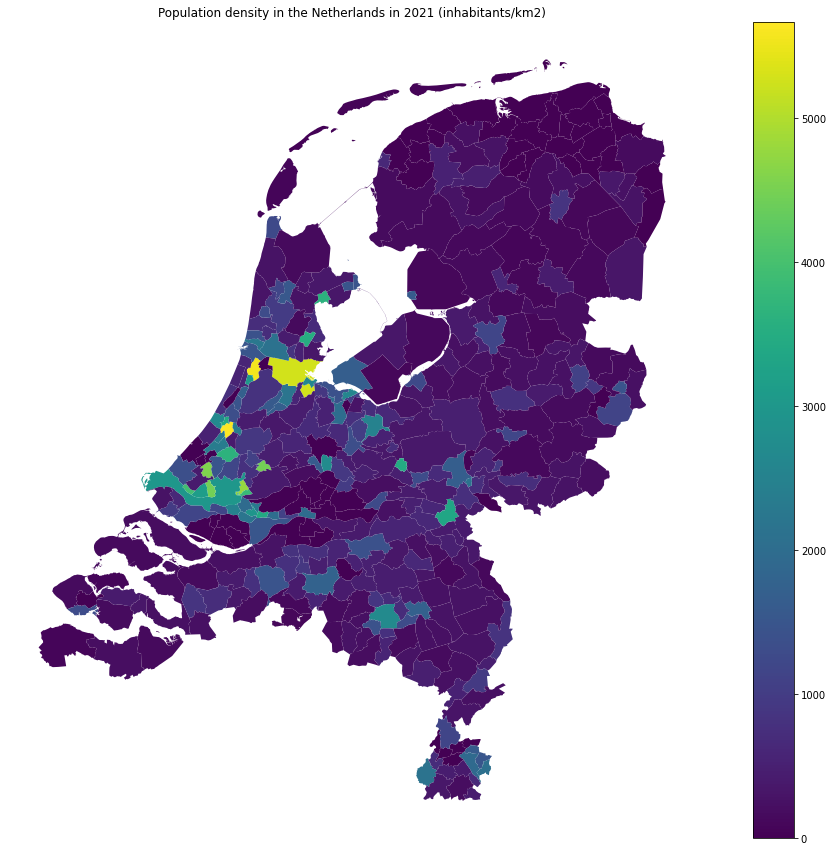

In [ ]:
municipalities_with = pd.merge(municipalities,data,left_on='statcode',right_on='RegioS_y', how = 'left')
municipalities_with['Inhabitants_per_km2'].fillna(0, inplace=True)
p = municipalities_with.plot(column='Inhabitants_per_km2',figsize = (20,15), legend=True)

p.axis('off')
p.set_title('Population density in the Netherlands in 2021 (inhabitants/km2)')




Chloropleth maps can easily visualise values over a geographical area, and is easy to interpret. Downsides are that it is not possible to accurately read or compare values from the map, and larger regions are more emphisised compared to smaller ones. This affects the viewer's perception.  

Just a basic plot, lets see how we can improve it! municipalities with a few more inhabitats compared to average have fallen into one big group and don't stand out as much in our current graph (the North and East seem to be 1 color). Lets see if we can change this by looking at the colour scales. 

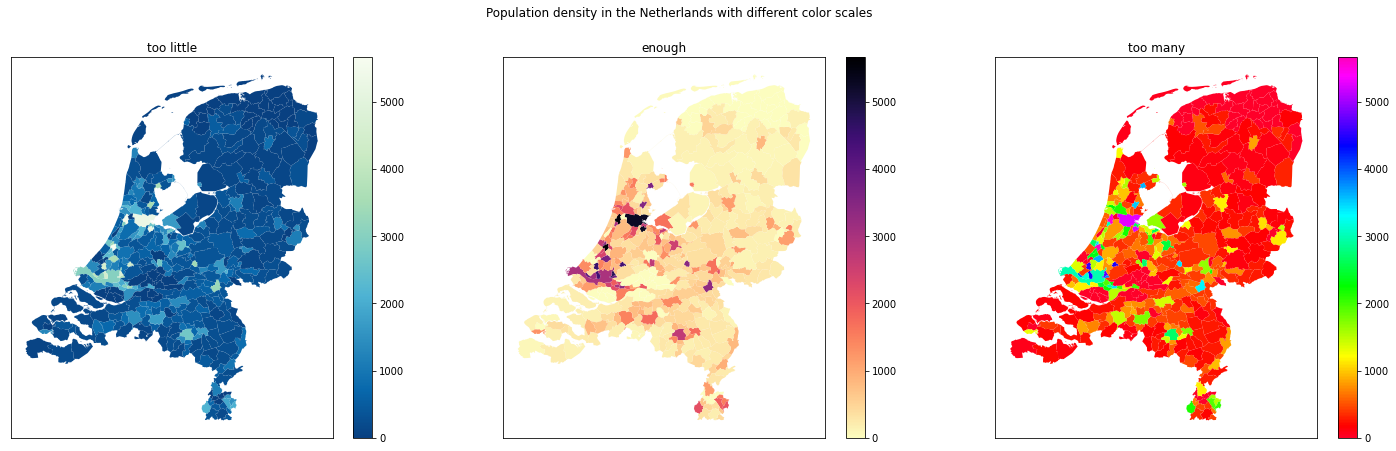

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True,figsize = (25,7))
fig.suptitle('Population density in the Netherlands with different color scales')

municipalities_with.plot(ax = ax1, column='Inhabitants_per_km2',legend= True, cmap= 'GnBu_r')
municipalities_with.plot(ax = ax2, column='Inhabitants_per_km2',legend= True,cmap='magma_r')
municipalities_with.plot(ax = ax3, column='Inhabitants_per_km2',legend= True, cmap= 'gist_rainbow')

ax1.axes.xaxis.set_visible(False)
ax1.axes.yaxis.set_visible(False)
ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
ax3.axes.xaxis.set_visible(False)
ax3.axes.yaxis.set_visible(False)


ax1.title.set_text('too little')
ax2.title.set_text('enough')
ax3.title.set_text('too many')





With the first graph there is no clear devision outside of the Randstad, too little colours are used. The last graph uses too many colors, there is no clear structure in the map. You need to be able to look at it and understand it at first glance. This happends at the middle graph. However, to make it even clearer lets change its background. 

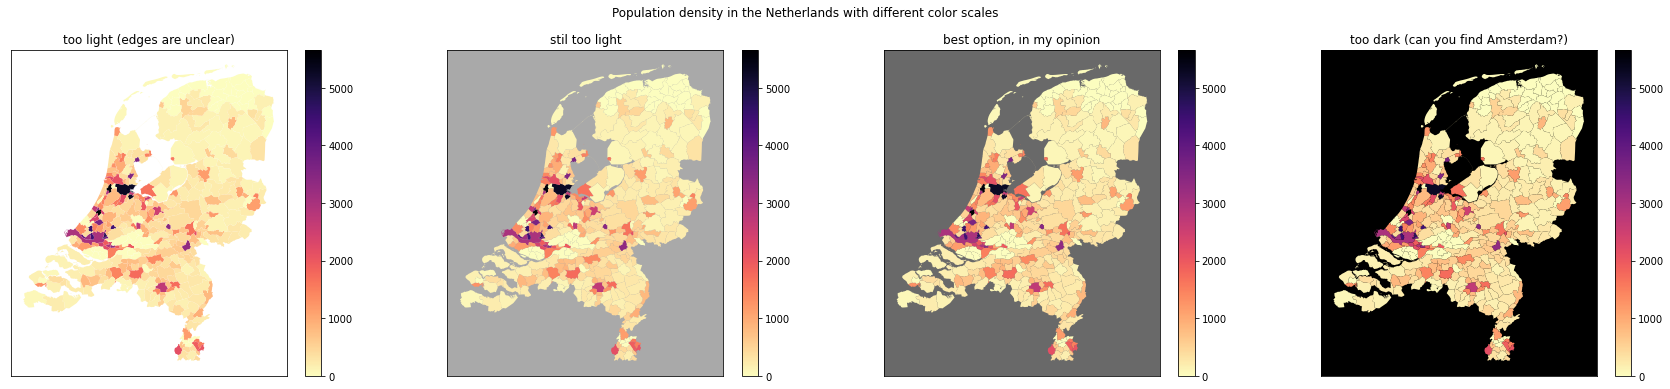

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, sharey=True,figsize = (30,6))
fig.suptitle('Population density in the Netherlands with different color scales')

ax1.set_facecolor('white')
ax2.set_facecolor('darkgrey')
ax3.set_facecolor('dimgrey')
ax4.set_facecolor('black')


municipalities_with.plot(ax = ax1, column='Inhabitants_per_km2', legend= True, cmap= 'magma_r')
municipalities_with.plot(ax = ax2, column='Inhabitants_per_km2', legend= True,cmap='magma_r')
municipalities_with.plot(ax = ax3, column='Inhabitants_per_km2',legend= True, cmap= 'magma_r')
municipalities_with.plot(ax = ax4, column='Inhabitants_per_km2',legend= True, cmap= 'magma_r')


ax1.axes.xaxis.set_visible(False)
ax1.axes.yaxis.set_visible(False)
ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
ax3.axes.xaxis.set_visible(False)
ax3.axes.yaxis.set_visible(False)
ax4.axes.xaxis.set_visible(False)
ax4.axes.yaxis.set_visible(False)


ax1.title.set_text('too light (edges are unclear)')
ax2.title.set_text('stil too light')
ax3.title.set_text('best option, in my opinion')
ax4.title.set_text('too dark (can you find Amsterdam?)')





Of course the perfect colorscale and background color are also a subjective matter, but it is good to pay some attention to it to make the map the clearest as possible. Now lets move on to the next visualisation method.

### Dot map
Dot maps use markers to show patterns in the geographic distribution of a certain parameter. In this case we will be exploring the distribution of German cities and their populationsizes. They make it easy to give an overview of the data, especially since it is easy to include multiple parameters by using multiple colors and sizes. Again, they are not so great for retrieving exact values but are mostly used for giving an overview. 

In [ ]:
#only run when geoplot not yet installed
!pip install geoplot

In [ ]:
import pandas as pd
import geopandas
import geoplot
import geoplot.crs as gcrs
import matplotlib.pyplot as plt




We'll use the package geoplot, together with a dataset on the locations of german cities. Lets first look at the datset. It contains the latitude, longitude and population of each city. 

In [ ]:
df = pd.read_csv('/content/de.csv',delimiter=';')
df.dropna(inplace = True)
df.drop(df.index[df['population'] == '0'], inplace = True)
df
#df.shape

,city,latitude,longitude,population
0,Berlin,52.5167,13.3833,3644826.0
1,Hamburg,53.5500,10.0000,1841179.0
2,Munich,48.1372,11.5755,1471508.0
3,Cologne,50.9422,6.9578,1085664.0
4,Frankfurt,50.1136,8.6797,753056.0
...,...,...,...,...
587,Altenkirchen,50.6872,7.6456,6263.0
588,Neustadt,49.7306,12.1706,5727.0
589,Seelow,52.5167,14.3831,5426.0
590,Kusel,49.5347,7.3981,5405.0


Lets plot the city points and the shape of germany (which is available through the "world" dataset in the geopandas extention).  

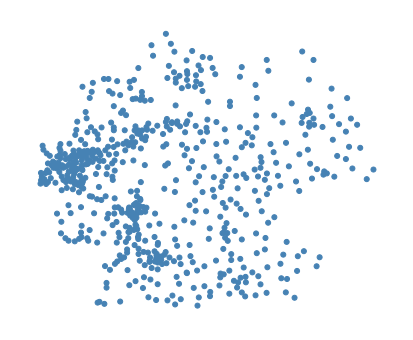

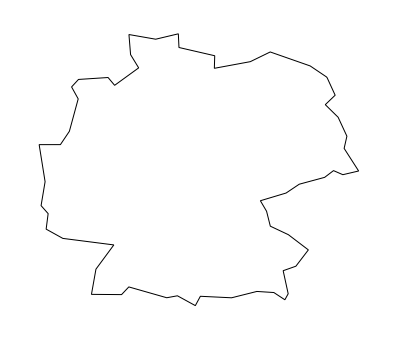

In [ ]:
#plotting cities
cities = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.longitude, df.latitude))
geoplot.pointplot(cities)

#importing and plotting germany
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
germany = world[(world.name == "Germany")]
geoplot.polyplot(germany)


Now adding them together:

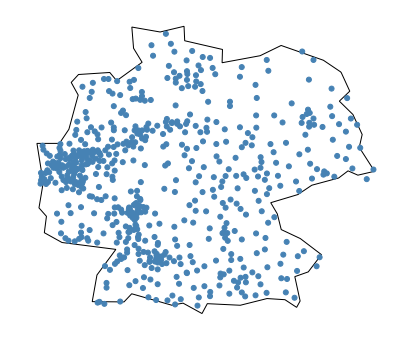

In [ ]:
ax = geoplot.polyplot(germany)
geoplot.pointplot(cities, ax=ax)


Okay so we can see the distribution of the cities. Now lets try to make the map a little more interesting, by looking at the different population sizes. 

Text(0.5, 1.0, 'populations in German Cities')

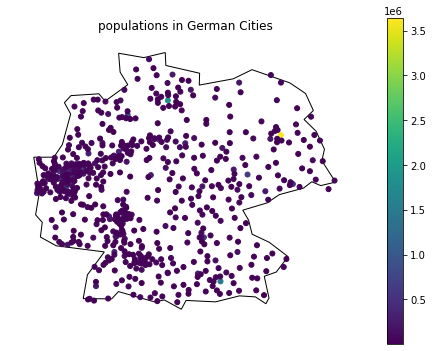

In [ ]:
ax = geoplot.polyplot(germany)
geoplot.pointplot(cities, ax=ax, hue='population',legend=True)
plt.title("populations in German Cities")


Okay, we have talked about this. You can see the really big cities, but all the others are the same size on this scale. Instead of only altering the color scale, lets also change it to a log scale. 

Text(0.5, 1.0, 'populations in German Cities (x 10log')

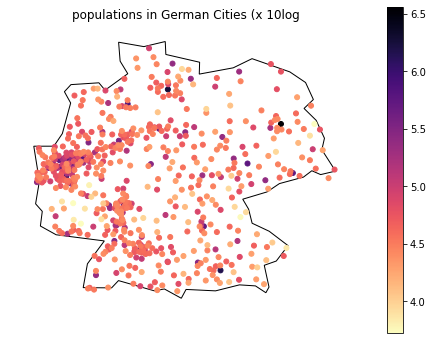

In [ ]:
ax = geoplot.polyplot(germany)
from numpy import log10
df['log_pop'] = log10(df['population'])

p = geoplot.pointplot(cities, ax=ax, hue='log_pop', cmap= 'magma_r',legend=True)
plt.title("populations in German Cities (x 10log")


That looks pretty good, it is easy to spot the bigger cities. We can also do this by changing the marker size.

Text(0.5, 1.0, 'populations in German Cities (x 10log)')

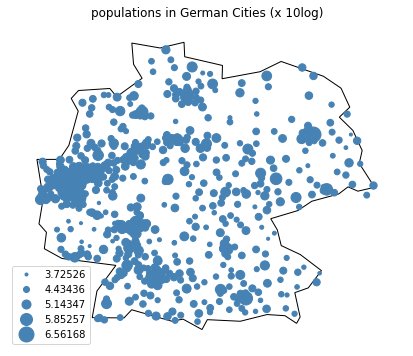

In [ ]:
ax = geoplot.polyplot(germany)
p = geoplot.pointplot(cities, ax=ax, scale ='log_pop',legend=True, limits = (3,15))
plt.title("populations in German Cities (x 10log)")



and also together.

Text(0.5, 1.0, 'populations in German Cities (x 10log)')

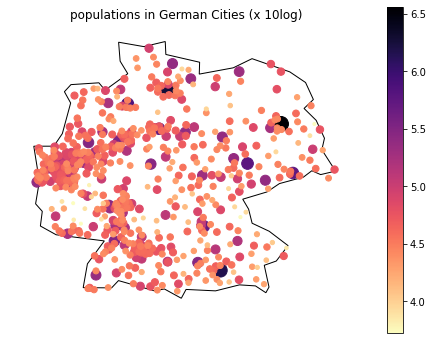

In [ ]:
ax = geoplot.polyplot(germany)
p = geoplot.pointplot(cities, ax=ax, scale = 'log_pop', hue='log_pop', cmap= 'magma_r', limits = (3,15),legend=True, legend_var= "hue")
plt.title("populations in German Cities (x 10log)")





That is a nice overview! It is easy to see where the cities are located and which one are the biggest. You know how else we can plot the city distribution, with a heatmap! let's move on to the last map type.


### Heatmap
A heatmap is a little bit like the combination of the last two maps: there are no strict geographical areas like for the cloropleth map, but it also doesn't use markers like the dot map does. Again, they make it easy to spot trends at a glace and overall look pretty cool. Take a look! 

We'll be plotting the spread of cities throughout China. 


In [ ]:
df = pd.read_csv('/content/china.csv',delimiter=';')
df.dropna(inplace = True)

china_cities = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.lng, df.lat))

#importing and plotting nl
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
china = world[(world.name == "China")]



/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


Text(0.5, 1.0, 'populations in Chinese Cities')

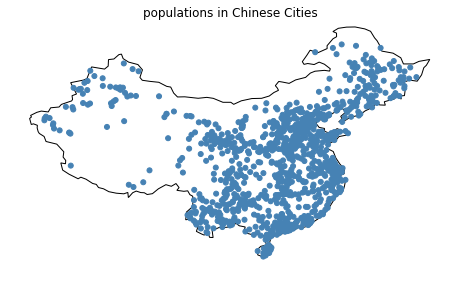

In [ ]:
ax = geoplot.polyplot(china)
p = geoplot.pointplot(china_cities, ax=ax)
plt.title("Spread of Chinese Cities")

Okay this we know, a simple pointplot. Doesn't look that spectacular, and the South-East seems like one big cluster. 

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:616: UserWarning: Cannot set "figsize" when passing an "ax" to the plot. To remove this warning omit the "figsize" parameter.
  'Cannot set "figsize" when passing an "ax" to the plot. To remove this '
/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


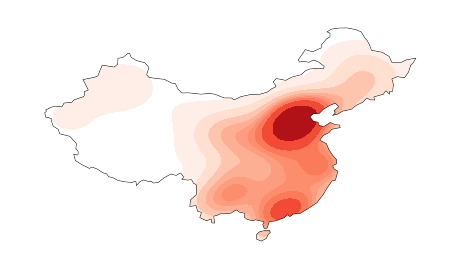

In [ ]:
ax = geoplot.kdeplot(china_cities, cmap='Reds', shade = True, clip = china.geometry)
geoplot.polyplot(china,zorder=1,  ax=ax, figsize = (15,10))
plt.title("Spread of Chinese Cities")

This is much better! You can easily spot that the hotspot for cities is in the South-Easter part of China, but it doesn't look like one big cluster anymore. In heatmaps like these it is much harder to implement multiple variables compared to the dotmap. 

concluding:
We've talked about three different map types: the cloropleth map, dot map and the heatmap. All three maps are mainly used for showing patterns instead of communicating precise values. They are similar, but each still have their own specialities. When combining multiple variables, the dot map is the way to go. And the difference between the cloropleth map and the heatmap is the use of geographical area. Depending on what you want to communicate chose which map is the most usefull and there is always the possibility of showing the same data in different ways. Remeber that emphisising certain variables and how this is presented affects the viewer's perception and is never without bias!

###*For now this concludes this Jupyter Notebook. We've discussed and practiced with three map types for the visualisation of spatial data.* 


####Sources
- https://datavizcatalogue.com/methods/choropleth.html 
- https://opendata.cbs.nl/statline/#/CBS/nl/dataset/70072NED/table?fromstatweb 
- https://simplemaps.com/data/de-cities
- https://simplemaps.com/data/cn-cities
- https://residentmario.github.io/geoplot/quickstart/quickstart.html 
- https://stackoverflow.com/questions/60868592/use-uk-map-instead-of-south-america-as-in-website-tutorial 
- https://geopandas.org/en/stable/gallery/plotting_with_geoplot.html 
- https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html 
- https://residentmario.github.io/geoplot/user_guide/Customizing_Plots.html 